## Obteniendo Información de los datos

In [1]:
# Importando Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Obteniendo el dataframe
df = pd.read_csv('Dataset.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.describe()

## Datos Faltantes

In [ ]:
# Observando las dimensiones previas a la eliminación de campos vacios
df.shape

In [ ]:
# Comprobando el tamaño del dataframe después de haber eliminado campos vacíos
df_noNaN = df.replace(r'^\s*$', np.nan, regex=True)
df_noNaN = df_noNaN.dropna()
df_noNaN.shape

In [ ]:
# Obteniendo el porcentaje de campos faltantes totales del dataframe 
porcentaje_datos_faltantes = round(((df_noNaN.shape[0] * 100 / df.shape[0])-100)*-1,2)
print('Porcentaje de datos Faltantes en el dataframe: '+str(porcentaje_datos_faltantes)+' %')  

In [3]:
# Transformando los datos vacios del dataframe en np.nan
df_NaN = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
def count_NaN(x):
    i = 0
    for _ in df_NaN[df_NaN.columns[x]].isna():
        if _:
            i+=1

    return i

def porcentaje(column, NaN):
    return round(NaN * 100 / len(df[column]),2) if  NaN != 0 else 0

y = {}


for x in range(len(df.columns)):
    y[df.columns[x]] = count_NaN(x)


#print(porcentaje('Matrícula',5))

for column, nan in y.items():
    if len(column) >= 7 and len(column) < 16:
        print(f'|{column}\t\t|\t{porcentaje(column,nan)} %')
    elif len(column) >= 16 and len(column) <23: 
        print(f'|{column}\t|\t{porcentaje(column,nan)} %')
    elif len(column) >= 23: 
        print(f'|{column}|\t{porcentaje(column,nan)} %')
    elif len(column) < 7:
        print(f'|{column}\t\t\t|\t{porcentaje(column,nan)} %')
    print('-------------------------')




## Datos Inconsistentes

In [10]:
df_incon = df_NaN

In [ ]:
def is_float(x,df):
    try:
        df[x].astype(float)
        return True
    except:
        return False

In [89]:
for x in df_incon.columns:
    patron = r'^[0-9]+$'
    data_diff = df_incon[df_incon[x].notna() & ~df_incon[x].astype(str).str.match(patron)]
    
    filas_column = df_incon[x].count()
    count_diff = data_diff[x].count()
    porcent = round((count_diff*100/filas_column),2)
    
    if porcent > 0.0 and porcent < 100:
        print('-------------------------------- :: '+x+' :: --------------------------------')
        print('Total de filas en la columna: ',filas_column)
        print('Total de datos NO numericos: ',count_diff)
        print('Porcentaje de datos inconsistentes en esta columna: ',porcent)
        print('\n')

-------------------------------- :: Sexo :: --------------------------------
Total de filas en la columna:  584
Total de datos NO numericos:  63
Porcentaje de datos inconsistentes en esta columna:  10.79




In [ ]:
# Analisis del filtrado estandar
for x in df_incon.describe().columns:
    print('------------------------------------------')
    print(x)
    print('--------------')
    df_incon[x] = df_incon[x].astype(float)
    mean = df_incon[x].mean()
    std = df_incon[x].std()
    n_std = 1
    min = mean - n_std * std
    max = mean + n_std * std
    print('mean:',mean)
    print('std:',std)
    print('min:',min)
    print('max',max)
    
    filtro = df_incon[x].notna() & ~df_incon[x].between(min, max)
    data_diff_std = df_incon[filtro][x]
    #data_diff_std = df_incon[df_incon[x].notna() & ~df_incon[x].between(mean, max)][[x]]
    print('--------------')
    print(data_diff_std.value_counts())
    print(data_diff_std.count())
    print('------------------------------------------')



In [5]:
# Filtrando los datos entre los más estandar 

for x in df_incon.describe().columns:
    
    df_incon[x] = df_incon[x].astype(float)
    mean = df_incon[x].mean()
    std = df_incon[x].std()
    n_std = 1
    min = mean - n_std * std
    max = mean + n_std * std
    
    filtro = df_incon[x].notna() & ~df_incon[x].between(min, max)
    data_diff_std = df_incon[filtro][x]
    filas_column = df_incon[x].count()
    count_diff = data_diff_std.count()
    porcent = round((count_diff*100/filas_column),2)
    
    print('-------------------------------- :: '+x+' :: --------------------------------')
    print('Total de filas en la columna: ',filas_column)
    print('Total de datos fuera de lo estandar: ',count_diff)
    print('Porcentaje de datos fuera de lo estandar en esta columna: ',porcent)
    print('\n')

-------------------------------- :: Hijos :: --------------------------------
Total de filas en la columna:  617
Total de datos fuera de lo estandar:  46
Porcentaje de datos fuera de lo estandar en esta columna:  7.46


-------------------------------- :: Egreso Preparatoria :: --------------------------------
Total de filas en la columna:  617
Total de datos fuera de lo estandar:  2
Porcentaje de datos fuera de lo estandar en esta columna:  0.32


-------------------------------- :: Preparotoria :: --------------------------------
Total de filas en la columna:  617
Total de datos fuera de lo estandar:  279
Porcentaje de datos fuera de lo estandar en esta columna:  45.22


-------------------------------- :: Promedio Preparatoria :: --------------------------------
Total de filas en la columna:  617
Total de datos fuera de lo estandar:  261
Porcentaje de datos fuera de lo estandar en esta columna:  42.3


-------------------------------- :: Situación :: --------------------------------

In [87]:
for x in df_incon.columns:
    data_diff = df_incon[x].unique()
    filas_column = df[x].count()
    count_diff = len(data_diff)
    porcent = round((count_diff*100/filas_column),2)
    
    print('-------------------------------- :: '+x+' :: --------------------------------')
    print('Total de filas en la columna: ',filas_column)
    print('Total de datos unicos: ',count_diff)
    print('Porcentaje de datos unicos en esta columna: ',porcent)
    print('\n')

-------------------------------- :: Matrícula :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  617
Porcentaje de datos unicos en esta columna:  100.0


-------------------------------- :: Nombre :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  498
Porcentaje de datos unicos en esta columna:  80.71


-------------------------------- :: Sexo :: --------------------------------
Total de filas en la columna:  616
Total de datos unicos:  5
Porcentaje de datos unicos en esta columna:  0.81


-------------------------------- :: Casado :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  2
Porcentaje de datos unicos en esta columna:  0.32


-------------------------------- :: Edad :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  13
Porcentaje de datos unicos en esta columna:  2.11


-------------------------------- :

## Llenado de Datos NaN

In [4]:
df_fill = df_NaN

In [5]:
# Verificando si la columna se podría convertir en datos de tipo numerico

def is_float(x,df):
    try:
        df[x].astype(float)
        return True
    except:
        return False
    
#is_integer('Edad')

In [6]:
# Llenando los datos np.nan y reemplazandolos dependiendo del tipo de dato que contenían 

for x in df_fill.columns:
    if df_fill[x].isna().any():
        if is_float(x,df_fill):
            mean = round(df_fill[x].astype(float).mean(),2)
            df_fill[x].fillna(mean,inplace=True)
        else:
            cant_data = df_fill[x].value_counts()
            cant_data.idxmin()
            df_fill[x].fillna(cant_data.idxmin(),inplace=True)

C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\3927145196.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fill[x].fillna(cant_data.idxmin(),inplace=True)
C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\3927145196.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [93]:
# Comprobando si quedan datos nan

df_fill.isna().any()

Matrícula                  False
Nombre                     False
Sexo                       False
Casado                     False
Edad                       False
Fumador                    False
Trabajo                    False
Hijos                      False
Colonia                    False
Localidad                  False
CP                         False
Telefono Casa              False
Telefono Celular           False
Correo Electronico         False
IMSS                       False
Tipo de Sangre             False
Egreso Preparatoria        False
Preparotoria               False
Promedio Preparatoria      False
Certificado de Conducta    False
Tutor                      False
Codigo Tutor               False
Situación                  False
Periodo                    False
Creditos                   False
Materias Aprobadas         False
Materias Cursadas          False
dtype: bool

## Transformación de datos

In [7]:
# Copiando el df de los datos llenados con NaN
df_transform = df_fill

##### Transformando Variables Binarias

In [8]:
# Transformando la columna de "Sexo"
df_transform['Sexo'].replace('1',0,inplace=True)
df_transform['Sexo'].replace('2',1,inplace=True)
df_transform['Sexo'].replace('H',0,inplace=True)
df_transform['Sexo'].replace('M',1,inplace=True)

# Transformando la columna de "Casado"
df_transform['Casado'].replace('No',0,inplace=True)
df_transform['Casado'].replace('Si',1,inplace=True)

# Transformando la columna de "Fumador"
df_transform['Fumador'].replace('No',0,inplace=True)
df_transform['Fumador'].replace('Si',1,inplace=True)

# Transformando la columna de "Trabajo"
df_transform['Trabajo'].replace('No',0,inplace=True)
df_transform['Trabajo'].replace('Si',1,inplace=True)

# Transformando la columna de "Telefono Casa"
df_transform['Telefono Casa'].replace('No',0,inplace=True)
df_transform['Telefono Casa'].replace('Si',1,inplace=True)

# Transformando la columna de "Telefono Celular"
df_transform['Telefono Celular'].replace('No',0,inplace=True)
df_transform['Telefono Celular'].replace('Si',1,inplace=True)

# Transformando la columna de "Correo Electronico"
df_transform['Correo Electronico'].replace('No',0,inplace=True)
df_transform['Correo Electronico'].replace('Si',1,inplace=True)

# Transformando la columna de "IMSS"
df_transform['IMSS'].replace('No',0,inplace=True)
df_transform['IMSS'].replace('Si',1,inplace=True)


C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\4179406229.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_transform['Sexo'].replace('M',1,inplace=True)
C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\4179406229.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transform['Casado'].re

##### Transformando Variables Clasificables

In [9]:
# Transformando la columna de "Promedio Preparatoria"
cl = 'Promedio Preparatoria'
df_transform[cl] = df_transform[cl].astype(int)
for x in range(len(df_transform[cl])):
    prom = int(df_transform[cl][x])
    if prom > 6 and prom < 8:
        df_transform[cl][x] = 0
    elif prom >= 8 and prom < 9:
        
        df_transform[cl][x] = 1
    elif prom >= 9 and prom <= 10:
        
        df_transform[cl][x] = 2


# Transformando la columna de "Certificado de Conducta"
df_transform['Certificado de Conducta'].replace('MALO',0,inplace=True)
df_transform['Certificado de Conducta'].replace('REGULAR',1,inplace=True)
df_transform['Certificado de Conducta'].replace('BUENO',2,inplace=True)

C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\2639084013.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_transform[cl][x] = 0
C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\2639084013.py:7: SettingWithCopyWarning: 
A value is t

#### Transformando Variables Categoricas

In [10]:
# Transformando las variables numericas categoricas

from sklearn.preprocessing import LabelEncoder
labelencorer = LabelEncoder()
df_transform['Localidad'] = labelencorer.fit_transform(df_transform['Localidad'])
df_transform['Tipo de Sangre'] = labelencorer.fit_transform(df_transform['Tipo de Sangre'])

In [11]:
# Transformando las variables categoricas a variables Dummy

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),['Localidad'])],remainder='passthrough')
ct_2 = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),['Tipo de Sangre'])],remainder='passthrough')

# Aplicar ColumnTransformer y convertir el resultado a DataFrame de pandas
dummy = pd.DataFrame(ct.fit_transform(df_transform))
dummy_2 = pd.DataFrame(ct_2.fit_transform(df_transform))



#### Concatenando Datos

In [ ]:

df_transform.describe()

In [ ]:
dummy.head()

In [ ]:
dummy_2.head()

In [12]:
df_aux = pd.concat([dummy.iloc[:, :9], df_transform], axis=1)
df_aux_2 = pd.concat([dummy_2.iloc[:, :12], df_transform], axis=1)

In [13]:
df_aux = df_aux.iloc[:,:9]
df_aux.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df_aux_2 = df_aux_2.iloc[:,:12]
df_aux_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Cambiando el nombre de las columnas

In [15]:
rename_columns = ['L' + str(x) for x in range(len(df_aux.columns))]
df_aux.columns = rename_columns

In [ ]:
df_aux.head()

In [16]:
rename_columns = ['S' + str(x) for x in range(len(df_aux_2.columns))]
df_aux_2.columns = rename_columns

In [ ]:
df_aux_2.head()

In [17]:
df_aux_2 = pd.concat([df_aux.iloc[:, :9], df_aux_2], axis=1)

In [ ]:
df_aux_2.head()

In [18]:
df_transform = pd.concat([df_aux_2.iloc[:, :], df_transform], axis=1)
df_transform.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Matrícula,Nombre,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Colonia,Localidad,CP,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Tipo de Sangre,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Tutor,Codigo Tutor,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052001,ISVI PAUL,0,0,18,0,1,0,LÓPEZ MATEOS,7,82140,1,1,1,1,3,2005,5,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4,1,40,9,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052002,MARIA DEL ROSARIO,1,0,18.91,1,1,0,LIBERTAD,7,82010,1,1,1,1,3,2005,5,2,2,PHILADELPHO PACHECO BOJÓRQUEZ,BIO5,5,14,400,69,69
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052003,VICTOR JOAQUIN,0,0,18,1,0,0,FRANCISCO VILLA,7,82127,1,1,1,1,9,2006,6,2,2,IDALIA OSUNA RUIZ,BIO2,5,13,400,69,69
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052005,CINTHYA,1,1,25,1,1,4,INFONAVIT PLAYAS,7,82128,1,0,1,0,3,2005,4,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052006,GINESA ELIZET,1,1,18,0,0,0,LOMA ATRAVESADA,7,82185,1,1,1,1,9,2005,3,2,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,5,10,400,69,69


In [107]:
df_transform.drop(columns=['Localidad','Tipo de Sangre'],inplace=True)
df_transform.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Matrícula,Nombre,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Colonia,CP,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Tutor,Codigo Tutor,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052001,ISVI PAUL,0,0,18,0,1,0.0,LÓPEZ MATEOS,82140,1,1,1,1,2005.0,5.0,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4.0,1.0,40.0,9.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052002,MARIA DEL ROSARIO,1,0,18.91,1,1,0.0,LIBERTAD,82010,1,1,1,1,2005.0,5.0,2,2,PHILADELPHO PACHECO BOJÓRQUEZ,BIO5,5.0,14.0,400.0,69.0,69.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052003,VICTOR JOAQUIN,0,0,18,1,0,0.0,FRANCISCO VILLA,82127,1,1,1,1,2006.0,6.0,2,2,IDALIA OSUNA RUIZ,BIO2,5.0,13.0,400.0,69.0,69.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052005,CINTHYA,1,1,25,1,1,4.0,INFONAVIT PLAYAS,82128,1,0,1,0,2005.0,4.0,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052006,GINESA ELIZET,1,1,18,0,0,0.0,LOMA ATRAVESADA,82185,1,1,1,1,2005.0,3.0,2,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,5.0,10.0,400.0,69.0,69.0


#### DF Tansformada

In [112]:
df_transform.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Matrícula,Nombre,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Colonia,CP,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Tutor,Codigo Tutor,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052001,ISVI PAUL,0,0,18,0,1,0.0,LÓPEZ MATEOS,82140,1,1,1,1,2005.0,5.0,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4.0,1.0,40.0,9.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052002,MARIA DEL ROSARIO,1,0,18.91,1,1,0.0,LIBERTAD,82010,1,1,1,1,2005.0,5.0,2,2,PHILADELPHO PACHECO BOJÓRQUEZ,BIO5,5.0,14.0,400.0,69.0,69.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052003,VICTOR JOAQUIN,0,0,18,1,0,0.0,FRANCISCO VILLA,82127,1,1,1,1,2006.0,6.0,2,2,IDALIA OSUNA RUIZ,BIO2,5.0,13.0,400.0,69.0,69.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BIO052005,CINTHYA,1,1,25,1,1,4.0,INFONAVIT PLAYAS,82128,1,0,1,0,2005.0,4.0,0,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BIO052006,GINESA ELIZET,1,1,18,0,0,0.0,LOMA ATRAVESADA,82185,1,1,1,1,2005.0,3.0,2,1,JESÚS AARÓN SALAZAR LEYVA,BIO3,5.0,10.0,400.0,69.0,69.0


### Elimnando Columnas

In [19]:
columnas = ['Matrícula','Nombre','Colonia','CP','Tutor','Codigo Tutor']
df_transform = df_transform.drop(columns=columnas)
print('Columnas Eliminadas')

Columnas Eliminadas


### Resultado Después del pre-procesamiento de datos

In [116]:
df_transform.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,18,0,1,0.0,1,1,1,1,2005.0,5.0,0,1,4.0,1.0,40.0,9.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,18.91,1,1,0.0,1,1,1,1,2005.0,5.0,2,2,5.0,14.0,400.0,69.0,69.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,18,1,0,0.0,1,1,1,1,2006.0,6.0,2,2,5.0,13.0,400.0,69.0,69.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,25,1,1,4.0,1,0,1,0,2005.0,4.0,0,1,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,18,0,0,0.0,1,1,1,1,2005.0,3.0,2,1,5.0,10.0,400.0,69.0,69.0


## Selección de Datos

### Primer metodo

In [39]:
df_select = df_transform

In [40]:
corr_mtx = df_select.corr()

In [41]:
data = {
    'Atributo_1':[],
    'Atributo_2':[],
    'Correlación':[]      
}

In [43]:

for x in range(len(corr_mtx.columns)):
    col = corr_mtx.columns[x]
    for y in range(len(corr_mtx[col])):
        #print('x:',x)
        #print('y:',y)
        value = round(corr_mtx[col][y],2)
        col_x = corr_mtx.columns[x]
        col_y = corr_mtx.columns[y]
        if col_x == col_y:
            break

        
        if (value >= 0.50 and value != 1) or (value <= -0.50 and value != -1):
            data['Atributo_1'].append(col_x)
            data['Atributo_2'].append(col_y)
            data['Correlación'].append(value)


            
df_corr = pd.DataFrame(data)          

C:\Users\gaels\AppData\Local\Temp\ipykernel_10976\1419771081.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = round(corr_mtx[col][y],2)


In [242]:
df_corr

,Atributo_1,Atributo_2,Correlación
0,L7,L6,-0.50
1,S9,S3,-0.74
2,Hijos,Casado,0.66
3,IMSS,Telefono Casa,0.57
4,Situación,Promedio Preparatoria,0.61
5,Creditos,Promedio Preparatoria,0.68
6,Creditos,Periodo,0.85
7,Materias Aprobadas,Promedio Preparatoria,0.63
8,Materias Aprobadas,Periodo,0.88
9,Materias Aprobadas,Creditos,0.99


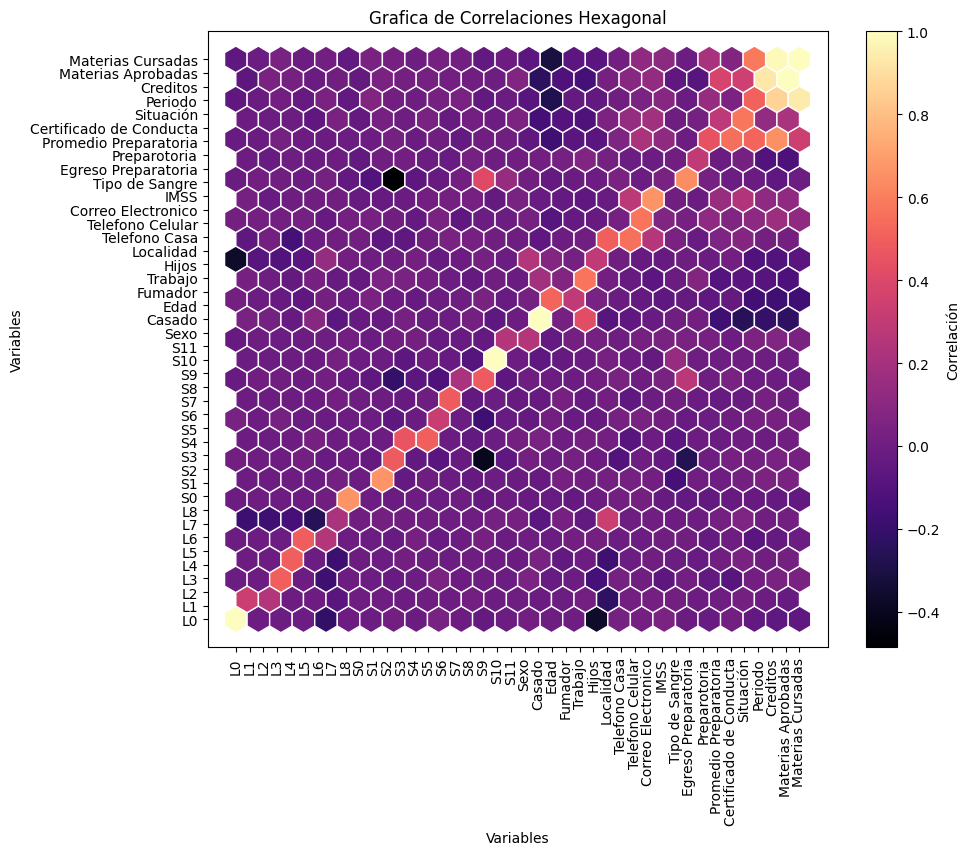

In [137]:

# Generar coordenadas x e y con las etiquetas de las variables
x, y = np.meshgrid(range(len(corr_mtx.columns)), range(len(corr_mtx.columns)))

# Aplana los valores de la matriz de correlación y elimina los valores de la diagonal
correlation_values = corr_mtx.values.flatten()

# Graficar los datos con gráfico hexbin
plt.figure(figsize=(10, 8))
plt.hexbin(x=x.flatten(), y=y.flatten(), C=correlation_values,edgecolor = "white", gridsize=25, cmap='magma')

# Añadir barra de color
plt.colorbar(label='Correlación')

# Ajustar las etiquetas del eje x y eje y
plt.xticks(ticks=np.arange(len(corr_mtx.columns)), labels=corr_mtx.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_mtx.columns)), labels=corr_mtx.columns)

# Añadir título y etiquetas de los ejes
plt.title('Grafica de Correlaciones Hexagonal')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la gráfica
plt.show()

### Segundo Metodo

In [94]:
df_select = df_transform

In [95]:
X_df = df_select.drop(columns=['Situación'])
y_df = df_select['Situación']
X_df.astype(float)
X = X_df.iloc[::].values
y = y_df.iloc[:].values

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_df)

In [81]:
X

array([[-0.12835289, -0.04029115, -0.05702659, ..., -1.77221514,
        -1.81573212, -2.0173607 ],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.70465758,
         0.50366345,  0.46370947],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.70465758,
         0.50366345,  0.46370947],
       ...,
       [ 7.79102047, -0.04029115, -0.05702659, ...,  0.26432465,
         0.46500686,  0.54641181],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.4294495 ,
         0.61963323,  0.62911415],
       [-0.12835289, -0.04029115, -0.05702659, ..., -1.10483555,
        -1.04260026, -1.02493263]])

In [97]:
import statsmodels.api as sm
X = np.append(arr=np.ones((617,1)).astype(int), values=X, axis=1)

In [98]:
# Aplicando algoritmo de regresión hacía atrás

# Inicializando las variables optimas forzando columnas
X = X.astype(float)
X_opt = X[:].tolist()



In [99]:
# Inicializando el nivel de significación
sl = 0.05

regression_OLS = sm.OLS(y,X_opt).fit()

In [100]:
# Siguiendo reglas de eliminación hacía atrás
vali = False
while not vali:
    # Obtenemos el valor y el indice del valor más grande de los P-valores del modelo
    p_values_max_index = np.argmax(regression_OLS.pvalues)
    p_values_max_value = max(regression_OLS.pvalues)
    # Si el P-valor más grande es serior al nivel de significación eliminamos toda la columna y volvemos a ajustar el modelo
    if p_values_max_value > sl:
        X_opt = np.delete(X_opt, p_values_max_index, axis=1)
        regression_OLS = sm.OLS(y,X_opt).fit()
    # Si llega un punto en que los P-valores son infreiores al nivel de significación entonces damos por terminado el ajuste del modelo
    else:
        vali = True

In [101]:
# Mostramos Resultados Finales
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.08e-121
Time:                        12:53:20   Log-Likelihood:                -653.93
No. Observations:                 617   AIC:                             1330.
Df Residuals:                     606   BIC:                             1379.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2658      0.028    150.379      0.000       4.210       4.322
x1            -0.0824      0.029     -2.820      0.005      -0.140      -0.025
x2            -0.1139      0.030     -3.836      0.000      -0.172      -0.056
x3             0.0735      0.030      2.472      0.014       0.015       0.132
x4             0.1390      0.029      4.793      0.000       0.082       0.196
x5             0.0764      0.029      2.629      0.009       0.019       0.134
x6             0.3523      0.044      8.075      0.000       0.267       0.438
x7            -0.8763      0.069    -12.672      0.000      -1.012      -0.740
x8             2.3273      0.236      9.870      0.000       1.864       2.790
x9            -2.1028      0.422     -4.987      0.000      -2.931      -1.275
x10            0.6580      0.315      2.092      0.037       0.040       1.276
==============================================================================
Omnibus:                       71.854   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.297
Skew:                          -0.806   Prob(JB):                     8.28e-24
Kurtosis:                       4.239   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
for x in range(len(X_opt[0])):
    print(X_opt[x][0])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [117]:
X_opt.shape

(617, 11)

0
0
1.0
1
1.0
2
1.0
3
1.0
4
1.0
5
1.0
6
1.0
7
1.0
8
1.0
9
1.0
10
1.0
11
1.0
12
1.0
13
1.0
14
1.0
15
1.0
16
1.0
17
1.0
18
1.0
19
1.0
20
1.0
21
1.0
22
1.0
23
1.0
24
1.0
25
1.0
26
1.0
27
1.0
28
1.0
29
1.0
30
1.0
31
1.0
32
1.0
33
1.0
34
1.0
35
1.0
36
1.0
37
1.0
38
1.0
39
1.0
40
1.0
41
1.0
42
1.0
43
1.0
44
1.0
45
1.0
46
1.0
47
1.0
48
1.0
49
1.0
50
1.0
51
1.0
52
1.0
53
1.0
54
1.0
55
1.0
56
1.0
57
1.0
58
1.0
59
1.0
60
1.0
61
1.0
62
1.0
63
1.0
64
1.0
65
1.0
66
1.0
67
1.0
68
1.0
69
1.0
70
1.0
71
1.0
72
1.0
73
1.0
74
1.0
75
1.0
76
1.0
77
1.0
78
1.0
79
1.0
80
1.0
81
1.0
82
1.0
83
1.0
84
1.0
85
1.0
86
1.0
87
1.0
88
1.0
89
1.0
90
1.0
91
1.0
92
1.0
93
1.0
94
1.0
95
1.0
96
1.0
97
1.0
98
1.0
99
1.0
100
1.0
101
1.0
102
1.0
103
1.0
104
1.0
105
1.0
106
1.0
107
1.0
108
1.0
109
1.0
110
1.0
111
1.0
112
1.0
113
1.0
114
1.0
115
1.0
116
1.0
117
1.0
118
1.0
119
1.0
120
1.0
121
1.0
122
1.0
123
1.0
124
1.0
125
1.0
126
1.0
127
1.0
128
1.0
129
1.0
130
1.0
131
1.0
132
1.0
133
1.0
134
1.0
135
1.0
136
1.0
137
1.0
138


In [133]:
# Convirtiendolo a una database
data = {
    'X0':[],
    'X1':[],
    'X2':[],
    'X3':[],
    'X4':[],
    'X5':[],
    'X6':[],
    'X7':[],
    'X8':[],
    'X9':[],
    'X10':[]
}

In [134]:

lista = []
for y in range(X_opt.shape[0]-1):
    for x in range(X_opt.shape[1]-1):
       
        value = X_opt[y][x]
        data['X0'].append(value)
        data['X1'].append(value)
        data['X2'].append(value)
        data['X3'].append(value)
        data['X4'].append(value)
        data['X5'].append(value)
        data['X6'].append(value)
        data['X7'].append(value)
        data['X8'].append(value)
        data['X9'].append(value)
        data['X10'].append(value)

  
 

In [135]:
df_end = pd.DataFrame(data)

In [136]:
df_end.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851
2,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841
3,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177
4,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228
